In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('../data/spam.csv', encoding='ISO-8859-1')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

df.columns = ['labels', 'data']

In [3]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].as_matrix()

/Users/taylorperkins/Desktop/projects/nlp-101/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [5]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
print("TF-IDF")
tfidf = TfidfVectorizer(decode_error='ignore')
X = tfidf.fit_transform(df['data'])
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print(f"train score: {model.score(Xtrain, Ytrain)}")
print(f"test score: {model.score(Xtest, Ytest)}")

print("CountVectorizer")
count_vectorizor = CountVectorizer(decode_error='ignore')
X = count_vectorizor.fit_transform(df['data'])
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print(f"train score: {model.score(Xtrain, Ytrain)}")
print(f"test score: {model.score(Xtest, Ytest)}")

TF-IDF
train score: 0.9638360567907849
test score: 0.9472539423599783
CountVectorizer
train score: 0.994910259844629
test score: 0.9815116911364872


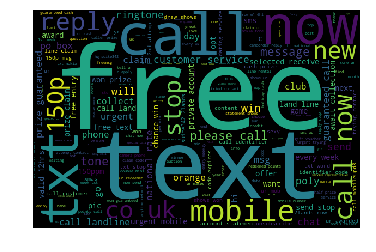

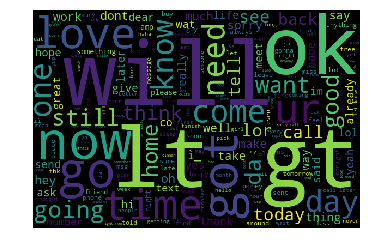

In [7]:
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        words += msg.lower() + ' '
        
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
visualize('spam')
visualize('ham')

In [8]:
df['predictions'] = model.predict(X)

In [9]:
df.head()

,labels,data,b_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [10]:
# Things that should be spam, but have been classified as NOT spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
Filthy stories and GIRLS waiting for your
Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 08707808226.
Can U get 2 phone NOW? I wanna chat 2 set up mee

In [11]:
# Things that should not be spam, but have been classified as spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
    print(msg)

Finally the match heading towards draw as your prediction.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
V-aluable. A-ffectionate. L-oveable. E-ternal. N-oble. T-ruthful. I-ntimate. N-atural. E-namous. Happy \VALENTINES DAY\" in advance"
wiskey Brandy Rum Gin Beer Vodka Scotch Shampain Wine \KUDI\"yarasu dhina vaazhthukkal. .."
staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
Ee msg na poortiyagi odalebeku: Hanumanji 7 name 1-Hanuman 2-Bajarangabali 3-Maruti 4-Pavanaputra 5-Sankatmochan 6-Ramaduth 7-Mahaveer ee 7 name  &lt;#&gt;  janarige ivatte kalisidare next saturday olage ondu good news keluviri...! Maretare inde 1 dodda problum nalli siguviri idu matra  &lt;#&gt; % true.. Don't neglet.
Brainless Baby Doll..:-D;-), vehicle sariyag drive madoke barolla..
wiskey Brandy Rum Gin Beer Vodka Scotch Shampain Wine \KUDI\"yarasu dhina vaazhthukkal. .."
Unlimited texts.